In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
voice = pd.read_csv('dataset_w_outcome.csv')
voice.head()

,Country,Year,Wins,Losses,Draws,Points Scored,Points Against,Ttl Games,Win Pct,PPG,position,ATT,MID,DEF,OVR,Finalist,Winner
0,Belgium,1930,0,2,0,0,4,2,0.000000,0.000000,0,0,0,0,0,0,0
1,Belgium,1934,0,1,0,2,5,1,0.000000,2.000000,0,0,0,0,0,0,0
2,Belgium,1938,0,1,0,1,3,1,0.000000,1.000000,0,0,0,0,0,0,0
3,Belgium,1954,0,1,1,5,8,2,0.000000,2.500000,0,0,0,0,0,0,0
4,Belgium,1970,1,2,0,4,5,3,0.333333,1.333333,0,0,0,0,0,0,0


In [3]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = voice[["PPG",'Points Scored', 'Win Pct', 'Wins']]
z = voice["Finalist"]
print(X.shape, z.shape)
### END SOLUTION

(422, 4) (422,)


Split our data into training and testing

In [4]:
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, z_train, z_test = train_test_split(X, z, random_state=1, stratify=z)
### END SOLUTION

Create a Logistic Regression Model

In [5]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier
### END SOLUTION

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Fit (train) or model using the training data

In [6]:
### BEGIN SOLUTION
classifier.fit(X_train, z_train)
### END SOLUTION

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Validate the model using the test data

In [7]:
### BEGIN SOLUTION
print(f"Training Data Score: {classifier.score(X_train, z_train)}")
print(f"Testing Data Score: {classifier.score(X_test, z_test)}")
### END SOLUTION

Training Data Score: 0.9272151898734177
Testing Data Score: 0.9622641509433962


Make predictions

In [8]:
### BEGIN SOLUTION
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {z_test[:10].tolist()}")
### END SOLUTION

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
df = pd.get_dummies(voice)
df.head()

,Year,Wins,Losses,Draws,Points Scored,Points Against,Ttl Games,Win Pct,PPG,position,...,Country_Switzerland,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_USA,Country_Ukraine,Country_United Arab Emirates,Country_Uruguay,Country_Yugoslavia
0,1930,0,2,0,0,4,2,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
1,1934,0,1,0,2,5,1,0.000000,2.000000,0,...,0,0,0,0,0,0,0,0,0,0
2,1938,0,1,0,1,3,1,0.000000,1.000000,0,...,0,0,0,0,0,0,0,0,0,0
3,1954,0,1,1,5,8,2,0.000000,2.500000,0,...,0,0,0,0,0,0,0,0,0,0
4,1970,1,2,0,4,5,3,0.333333,1.333333,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.corr()

,Year,Wins,Losses,Draws,Points Scored,Points Against,Ttl Games,Win Pct,PPG,position,...,Country_Switzerland,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_USA,Country_Ukraine,Country_United Arab Emirates,Country_Uruguay,Country_Yugoslavia
Year,1.000000,0.042175,0.089153,0.259914,-0.099382,-0.152954,0.244299,-0.037349,-0.310601,-0.021727,...,-0.061462,0.047214,0.047214,0.054598,-0.012489,0.002510,0.047214,0.015194,-0.047354,-0.113633
Wins,0.042175,1.000000,-0.435904,0.022744,0.837970,-0.038348,0.832390,0.921400,0.563278,0.505530,...,-0.043778,-0.048096,-0.048096,-0.080844,0.042601,-0.073769,0.014451,-0.048096,0.014134,0.018918
Losses,0.089153,-0.435904,1.000000,-0.436327,-0.360524,0.499842,-0.184170,-0.481791,-0.390447,-0.016830,...,0.013705,0.091031,0.029071,0.027260,0.041162,0.073124,0.029071,0.091031,0.011425,-0.005444
Draws,0.259914,0.022744,-0.436327,1.000000,0.076555,-0.182745,0.380369,-0.112800,-0.104240,0.153246,...,-0.048587,-0.048723,0.007150,0.014350,-0.029432,-0.048587,0.007150,-0.048723,0.025097,0.000472
Points Scored,-0.099382,0.837970,-0.360524,0.076555,1.000000,0.221138,0.733828,0.769953,0.835922,0.494685,...,-0.038034,-0.048973,-0.059566,-0.077036,0.065645,-0.065123,-0.006602,-0.038380,0.038799,0.037820
Points Against,-0.152954,-0.038348,0.499842,-0.182745,0.221138,1.000000,0.117241,-0.117924,0.178488,0.189549,...,0.016606,0.006924,-0.027655,-0.046832,0.071003,0.033187,0.024213,0.093370,0.019247,-0.017236
Ttl Games,0.244299,0.832390,-0.184170,0.380369,0.733828,0.117241,1.000000,0.645872,0.323268,0.611981,...,-0.067262,-0.030893,-0.030893,-0.062008,0.049251,-0.067262,0.034784,-0.030893,0.035647,0.017257
Win Pct,-0.037349,0.921400,-0.481791,-0.112800,0.769953,-0.117924,0.645872,1.000000,0.632989,0.337270,...,-0.000464,-0.059908,-0.059908,-0.089488,0.032960,-0.065124,0.013646,-0.059908,0.028819,0.059683
PPG,-0.310601,0.563278,-0.390447,-0.104240,0.835922,0.178488,0.323268,0.632989,1.000000,0.242472,...,0.006161,-0.057927,-0.077392,-0.077200,0.087279,-0.042372,-0.018997,-0.038462,0.043288,0.050259
position,-0.021727,0.505530,-0.016830,0.153246,0.494685,0.189549,0.611981,0.337270,0.242472,1.000000,...,-0.054048,-0.016908,-0.016908,-0.033937,0.087486,-0.054048,-0.016908,-0.016908,0.140159,0.026595


Text(0,0.5,'Interquantile range (in kHz)')

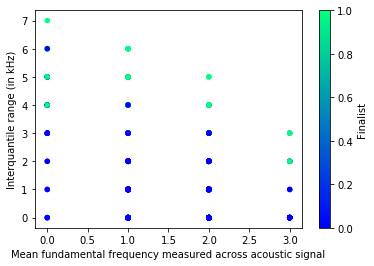

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(kind='scatter', ax=ax, x='Losses', y='Wins', c='Finalist', cmap='winter')
plt.xlabel('Mean fundamental frequency measured across acoustic signal')
plt.ylabel('Interquantile range (in kHz)')

Text(0,0.5,'Interquantile range (in kHz)')

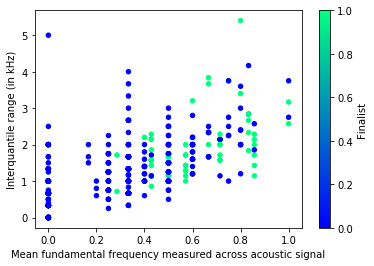

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(kind='scatter', ax=ax, x='Win Pct', y='PPG', c='Finalist', cmap='winter')
plt.xlabel('Mean fundamental frequency measured across acoustic signal')
plt.ylabel('Interquantile range (in kHz)')